In [84]:
import os
os.chdir('/Users/DHA/PycharmProjects/Imagery_Insights'); #print(os.listdir())
import rasterio

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import data, io, filters
%matplotlib inline

In [80]:
image_file ='ndvi_sample.tif'

with rasterio.open(image_file) as src:
   B0 = src.read()
   
ndvi = np.array(B0)
ndvi = ndvi.reshape(289,602)

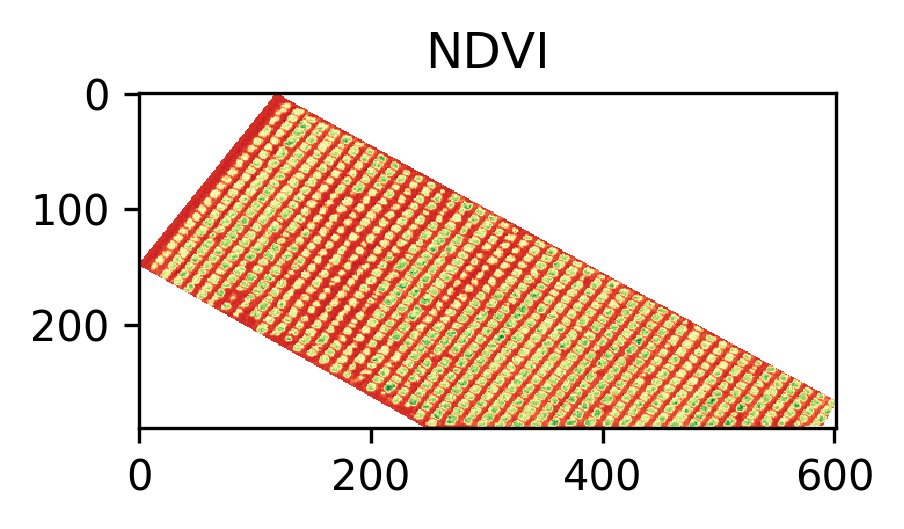

In [81]:
plt.figure(figsize=[3,3],dpi=300)
plt.imshow(ndvi,cmap='RdYlGn')
plt.title('NDVI');

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


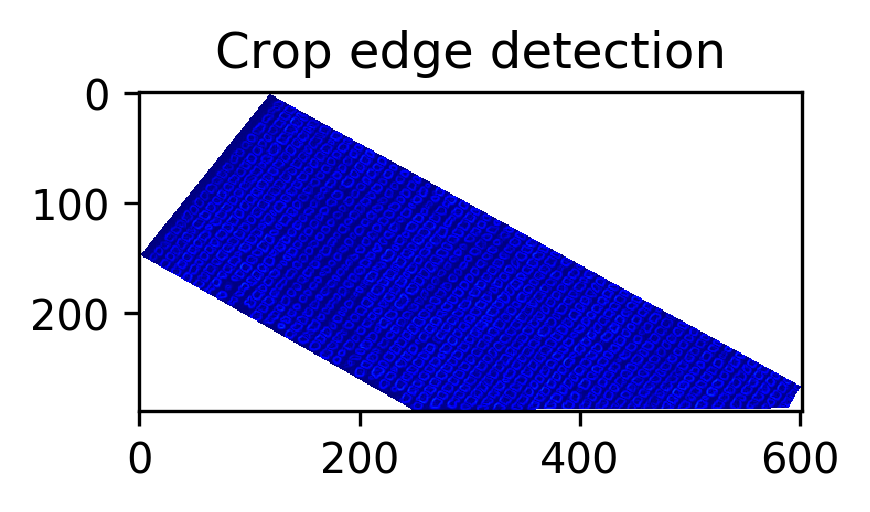

In [82]:
edges = filters.sobel(ndvi)
plt.figure(figsize=[3,3],dpi=300)
plt.title('Crop edge detection')
io.imshow(edges,cmap='jet')
io.show()

In [90]:
#Detect blobs using Laplacian of Gaussian (LoG) approach
from math import sqrt
from skimage.feature import blob_log
from skimage.color import rgb2gray

image = ndvi
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=100, num_sigma=50, threshold=.05)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/feature/peak.py:185: RuntimeWarning: invalid value encountered in greater
  mask &= image > max(thresholds)


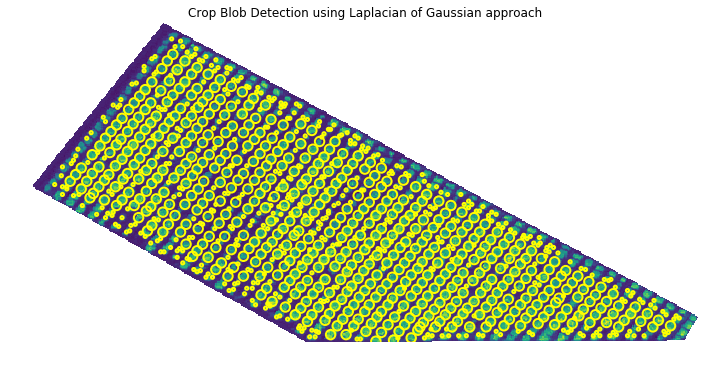

In [90]:
blobs_list = [blobs_log]
colors = ['yellow']
titles = ['Crop Blob Detection using Laplacian of Gaussian approach']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes


for idx, (blobs, color, title) in enumerate(sequence):
    ax.set_title(title)
    ax.imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax.add_patch(c)
    ax.set_axis_off()

plt.tight_layout()
plt.show()